In [1]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-04 18:09:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.102, 108.177.125.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-04 18:09:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  53.9MB/s    in 0.4s    

2025-11-04 18

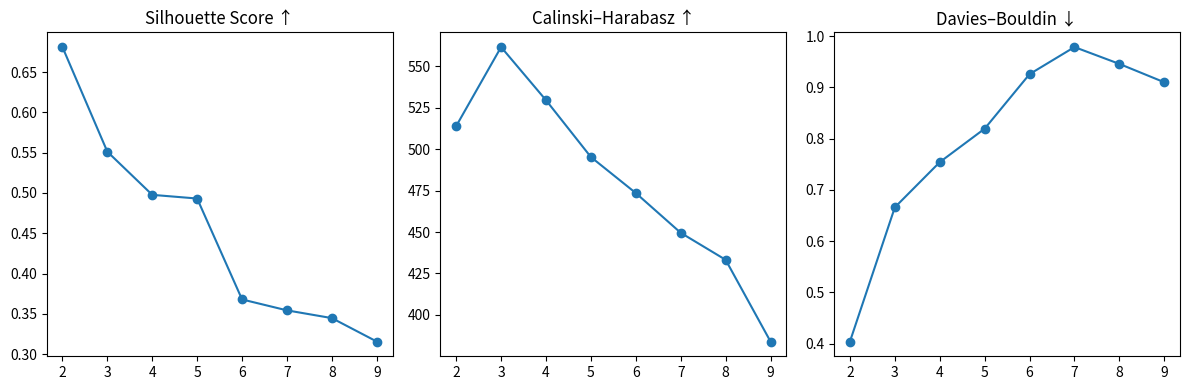

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X = load_iris().data

# 嘗試不同 k 值
sil_scores, ch_scores, db_scores = [], [], []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = model.labels_
    sil_scores.append(silhouette_score(X, labels))
    ch_scores.append(calinski_harabasz_score(X, labels))
    db_scores.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(k_range, sil_scores, 'o-'); plt.title("Silhouette Score ↑")
plt.subplot(132)
plt.plot(k_range, ch_scores, 'o-'); plt.title("Calinski–Harabasz ↑")
plt.subplot(133)
plt.plot(k_range, db_scores, 'o-'); plt.title("Davies–Bouldin ↓")
plt.tight_layout()
plt.show()

資料維度: (150, 4)

=== K-Means 評估指標 ===
                                    指標         值  理想方向
0               Silhouette Coefficient    0.5512  越高越好
1              Calinski–Harabasz Index  561.5937  越高越好
2                 Davies–Bouldin Index    0.6660  越低越好
3                        Inertia (SSE)   78.8557  越低越好
4            Adjusted Rand Index (ARI)    0.7163  越高越好
5  Normalized Mutual Information (NMI)    0.7419  越高越好
6                          Homogeneity    0.7364  越高越好
7                         Completeness    0.7475  越高越好
8                            V-Measure    0.7419  越高越好


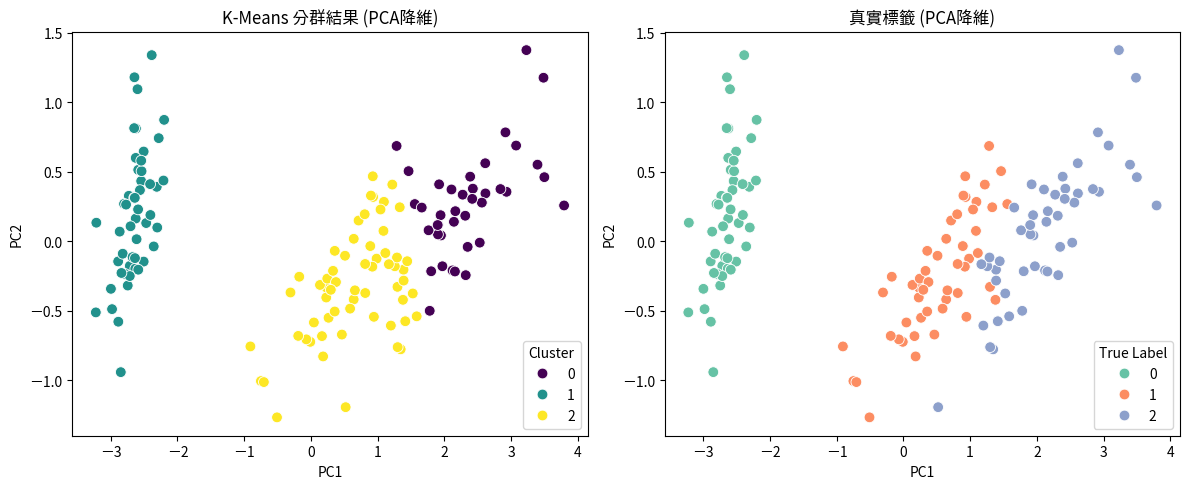

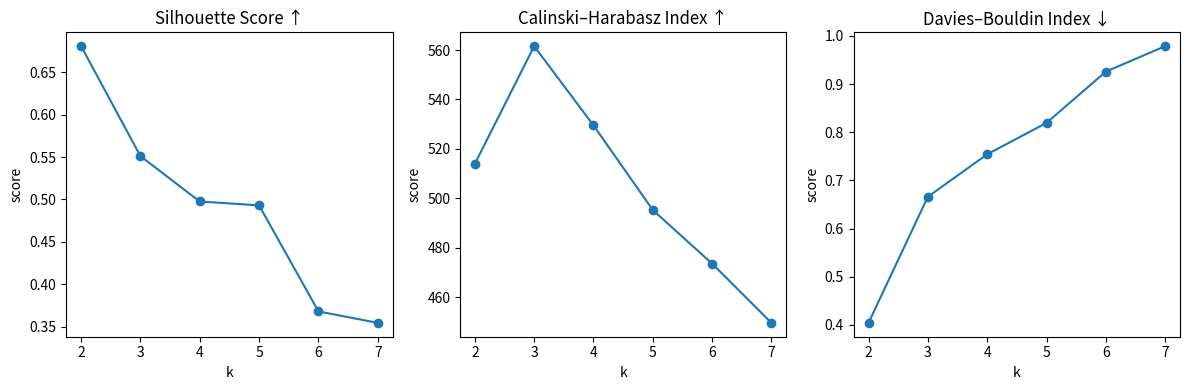

In [3]:
# -*- coding: utf-8 -*-
"""
Iris + K-Means 叢集分析與評估指標示範
作者: ChatGPT GPT-5
說明: 比較內部與外部指標、可視化叢集結果
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
)
import seaborn as sns

# === 1️⃣ 載入資料 ===
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names
print("資料維度:", X.shape)

# === 2️⃣ K-Means 叢集 ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X)

# === 3️⃣ 內部評估指標 ===
silhouette = silhouette_score(X, labels)
ch_score = calinski_harabasz_score(X, labels)
db_score = davies_bouldin_score(X, labels)
inertia = kmeans.inertia_

# === 4️⃣ 外部評估指標（需真實標籤） ===
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)
homo = homogeneity_score(y_true, labels)
comp = completeness_score(y_true, labels)
vscore = v_measure_score(y_true, labels)

# === 5️⃣ 結果整理表 ===
metrics = pd.DataFrame({
    '指標': [
        'Silhouette Coefficient',
        'Calinski–Harabasz Index',
        'Davies–Bouldin Index',
        'Inertia (SSE)',
        'Adjusted Rand Index (ARI)',
        'Normalized Mutual Information (NMI)',
        'Homogeneity',
        'Completeness',
        'V-Measure'
    ],
    '值': [
        silhouette, ch_score, db_score, inertia,
        ari, nmi, homo, comp, vscore
    ],
    '理想方向': [
        '越高越好', '越高越好', '越低越好', '越低越好',
        '越高越好', '越高越好', '越高越好', '越高越好', '越高越好'
    ]
})
print("\n=== K-Means 評估指標 ===")
print(metrics.round(4))

# === 6️⃣ PCA 降維後視覺化 ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = labels
df_plot['True'] = y_true

plt.figure(figsize=(12,5))

# (a) 叢集結果
plt.subplot(1,2,1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='viridis', s=60)
plt.title("K-Means 分群結果 (PCA降維)")
plt.legend(title='Cluster')

# (b) 真實標籤
plt.subplot(1,2,2)
sns.scatterplot(x='PC1', y='PC2', hue='True', data=df_plot, palette='Set2', s=60)
plt.title("真實標籤 (PCA降維)")
plt.legend(title='True Label')

plt.tight_layout()
plt.show()

# === 7️⃣ 不同 k 值的指標變化 ===
k_values = range(2, 8)
sil_list, ch_list, db_list = [], [], []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    sil_list.append(silhouette_score(X, km.labels_))
    ch_list.append(calinski_harabasz_score(X, km.labels_))
    db_list.append(davies_bouldin_score(X, km.labels_))

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(k_values, sil_list, 'o-')
plt.title("Silhouette Score ↑")
plt.xlabel("k"); plt.ylabel("score")

plt.subplot(132)
plt.plot(k_values, ch_list, 'o-')
plt.title("Calinski–Harabasz Index ↑")
plt.xlabel("k"); plt.ylabel("score")

plt.subplot(133)
plt.plot(k_values, db_list, 'o-')
plt.title("Davies–Bouldin Index ↓")
plt.xlabel("k"); plt.ylabel("score")

plt.tight_layout()
plt.show()


# Gaussian Mixture MODEL

In [8]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import (
silhouette_score,
calinski_harabasz_score,
davies_bouldin_score,
adjusted_rand_score,
normalized_mutual_info_score,
)


# === 1️⃣ 載入資料 ===
iris = load_iris()
X = iris.data
y_true = iris.target


# === 2️⃣ 測試四種 covariance_type ===
cov_types = ['full', 'tied', 'diag', 'spherical']
results = []


for cov in cov_types:
  gmm = GaussianMixture(n_components=3, covariance_type=cov, random_state=42)
  gmm.fit(X)
  labels = gmm.predict(X)


# 內部指標
  sil = silhouette_score(X, labels)
  ch = calinski_harabasz_score(X, labels)
  db = davies_bouldin_score(X, labels)


# 外部指標
  ari = adjusted_rand_score(y_true, labels)
  nmi = normalized_mutual_info_score(y_true, labels)

  results.append([cov, sil, ch, db, ari, nmi])


# === 3️⃣ 結果整理 ===
  columns = ['covariance_type', 'Silhouette', 'CH', 'DB', 'ARI', 'NMI']

df_results = pd.DataFrame(results, columns=columns)

print(df_results.round(4))


# === 4️⃣ 視覺化比較 ===
"""
fig, axes = plt.subplots(1, 2, figsize=(10,4))


# Silhouette 比較
sns.barplot(x='covariance_type', y='Silhouette', data=df_results, ax=axes[0], palette='viridis')
axes[0].set_title('Silhouette Score ↑')


# ARI 比較
plt.show()
"""

  covariance_type  Silhouette        CH      DB     ARI     NMI
0            full      0.5012  481.7807  0.7483  0.9039  0.8997
1            tied      0.4904  461.4088  0.7896  0.8857  0.8642
2            diag      0.5523  555.8420  0.6618  0.7445  0.7777
3       spherical      0.5528  561.6278  0.6620  0.7302  0.7582


"\nfig, axes = plt.subplots(1, 2, figsize=(10,4))\n\n\n# Silhouette 比較\nsns.barplot(x='covariance_type', y='Silhouette', data=df_results, ax=axes[0], palette='viridis')\naxes[0].set_title('Silhouette Score ↑')\n\n\n# ARI 比較\nplt.show()\n"

# DBSCAN

群數: 3, 離群點數量: 5
                  指標         值  理想方向
0         Silhouette    0.4230  越高越好
1  Calinski–Harabasz  171.2663  越高越好
2     Davies–Bouldin    5.0124  越低越好
3                ARI    0.5400  越高越好
4                NMI    0.6655  越高越好


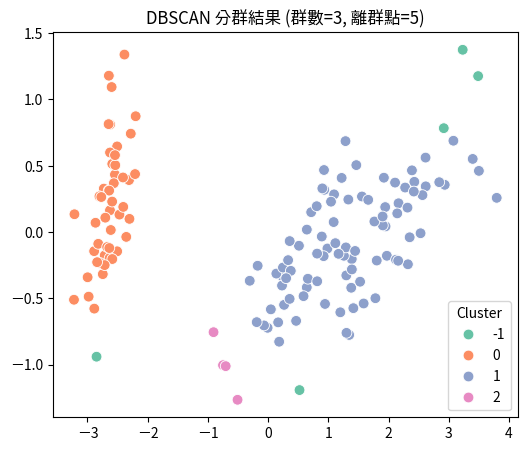

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)

# === 1️⃣ 載入資料 ===
iris = load_iris()
X = iris.data
y_true = iris.target

# === 2️⃣ 建立 DBSCAN 模型 ===
# eps: 鄰域半徑, min_samples: 最小點數
model = DBSCAN(eps=0.6, min_samples=4)
labels = model.fit_predict(X)

# === 3️⃣ 計算群數（排除 -1 為噪音） ===
unique_labels = np.unique(labels)
num_clusters = len(unique_labels[unique_labels != -1])
num_noise = list(labels).count(-1)
print(f"群數: {num_clusters}, 離群點數量: {num_noise}")

# === 4️⃣ 若至少有2個群則計算內部評估 ===
if num_clusters > 1:
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
else:
    sil, ch, db = np.nan, np.nan, np.nan

# === 5️⃣ 外部評估 ===
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

# === 6️⃣ 整理結果 ===
metrics = pd.DataFrame({
    '指標': ['Silhouette', 'Calinski–Harabasz', 'Davies–Bouldin', 'ARI', 'NMI'],
    '值': [sil, ch, db, ari, nmi],
    '理想方向': ['越高越好', '越高越好', '越低越好', '越高越好', '越高越好']
})
print(metrics.round(4))

# === 7️⃣ PCA 視覺化 ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=60)
plt.title(f'DBSCAN 分群結果 (群數={num_clusters}, 離群點={num_noise})')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


群數: 2, 離群點數量: 0
                  指標         值  理想方向
0         Silhouette    0.6867  越高越好
1  Calinski–Harabasz  502.8216  越高越好
2     Davies–Bouldin    0.3828  越低越好
3                ARI    0.5681  越高越好
4                NMI    0.7337  越高越好


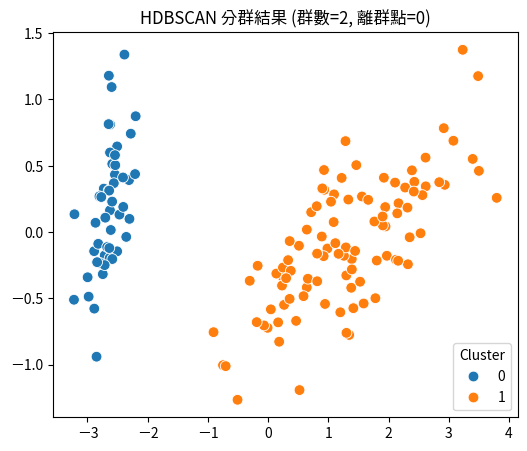

In [11]:
# -*- coding: utf-8 -*-
"""
Iris + HDBSCAN 叢集分析與評估指標示範

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
)
import hdbscan

# === 1️⃣ 載入資料 ===
iris = load_iris()
X = iris.data
y_true = iris.target

# === 2️⃣ 建立 HDBSCAN 模型 ===
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
labels = clusterer.fit_predict(X)

# === 3️⃣ 計算群數與離群點 ===
unique_labels = np.unique(labels)
num_clusters = len(unique_labels[unique_labels != -1])
num_noise = list(labels).count(-1)
print(f"群數: {num_clusters}, 離群點數量: {num_noise}")

# === 4️⃣ 內部評估指標 ===
if num_clusters > 1:
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
else:
    sil, ch, db = np.nan, np.nan, np.nan

# === 5️⃣ 外部評估 ===
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)

# === 6️⃣ 結果整理 ===
metrics = pd.DataFrame({
    '指標': ['Silhouette', 'Calinski–Harabasz', 'Davies–Bouldin', 'ARI', 'NMI'],
    '值': [sil, ch, db, ari, nmi],
    '理想方向': ['越高越好', '越高越好', '越低越好', '越高越好', '越高越好']
})
print(metrics.round(4))

# === 7️⃣ PCA 視覺化 ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='tab10', s=60)
plt.title(f'HDBSCAN 分群結果 (群數={num_clusters}, 離群點={num_noise})')
plt.legend(title='Cluster')
plt.show()

只有兩個叢集?

答案不對?? 20251105